## This notebook
- loads parquet files from `./outfiles0` and `./outfiles01`
- the former has candidate_fj defined as closest to the jet
- the latter has candidate_fj defined as closest to the jet but above dr>0.1 (cleaning)
- the sample is HWW semileptonic sample... 20 root files that were processed...

In [6]:
import json
import uproot
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema
from coffea import nanoevents
from coffea import processor
import time

import argparse
import warnings
import pyarrow as pa
import pyarrow.parquet as pq
import pickle as pkl
import pandas as pd
import os
import sys
sys.path.append("../")

from collections import defaultdict
import pickle as pkl
import pyarrow as pa
import awkward as ak
import numpy as np
import pandas as pd
import json
import os
import shutil
import pathlib
from typing import List, Optional
import pyarrow.parquet as pq

from coffea import processor
from coffea.nanoevents.methods import candidate, vector
from coffea.analysis_tools import Weights, PackedSelection
from boostedhiggs.utils import match_HWW
from boostedhiggs.btag import btagWPs
from boostedhiggs.btag import BTagCorrector

import hist as hist2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
from hist.intervals import clopper_pearson_interval

import warnings
warnings.filterwarnings("ignore", message="Found duplicate branch ")
warnings.filterwarnings("ignore", category=DeprecationWarning)
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

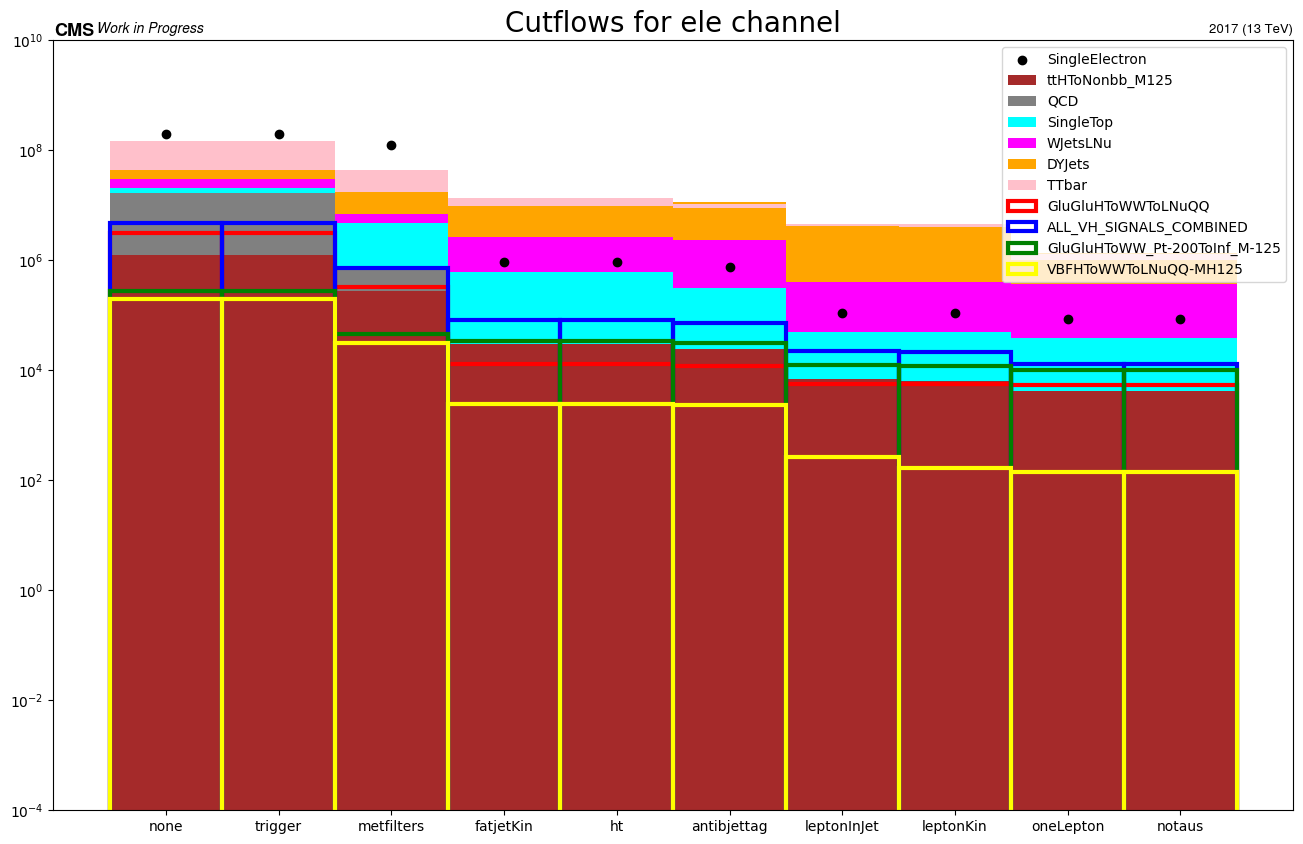

In [8]:
import mplhep as hep
# plt.style.use(hep.style.CMS)
plt.rcParams.update(plt.rcParamsDefault)

year = '2017'

ch = 'ele'
cut_keys = ['none', 'trigger', 'metfilters', 'fatjetKin', 'ht', 'antibjettag', 'leptonInJet', 'leptonKin', 'oneLepton', 'notaus']

with open(f"./cutflows/cut_values_{ch}.pkl", 'rb') as f:
    metadata = pkl.load(f)

sig = ['GluGluHToWWToLNuQQ', 'ALL_VH_SIGNALS_COMBINED', 'GluGluHToWW_Pt-200ToInf_M-125', 'VBFHToWWToLNuQQ-MH125']
bkg = ['DYJets', 'QCD', 'ttHToNonbb_M125', 'TTbar', 'SingleTop', 'WJetsLNu']

if ch=='ele':
    data = 'SingleElectron'
else:
    data = 'SingleMuon'
    
# order the bkg samples to stack by yields in the first bin
bkg_ordered = {}
for sample in bkg:
    bkg_ordered[sample] = metadata[sample][0]
bkg_ordered = sorted(bkg_ordered.items(), key=lambda x: x[1])    

bkg_ordered_samples = []
for elem in bkg_ordered:
    bkg_ordered_samples.append(elem[0])
    
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,10))

colors_sig=['red', 'blue', 'green', 'yellow', 'orange', 'cyan', 'brown', 'gray', 'magenta', 'magenta']
colors_bkg=['brown', 'gray', 'cyan', 'magenta', 'orange', 'pink']

stacking_y = 0

# add bkg stacked
for i, sample in enumerate(bkg_ordered_samples): 
    if stacking_y==0:
        ax.bar(range(len(metadata[sample])), 
               metadata[sample], 
               width=1, 
               tick_label=cut_keys, 
               log=True, 
               label=sample,
               color=colors_bkg[i]
              )
    else:
        ax.bar(range(len(metadata[sample])), 
               metadata[sample], 
               width=1, 
               bottom=stacking_y, 
               tick_label=cut_keys, 
               log=True, 
               label=sample,
               color=colors_bkg[i]
              )
    stacking_y = metadata[sample]  

# add sig
for i, sample in enumerate(sig): 
        if sample in sig:
            ax.bar(range(len(metadata[sample])), 
               metadata[sample], 
               width=1, 
               tick_label=cut_keys, 
               log=True, 
               label=sample, 
                fill=False,
                edgecolor=colors_sig[i],
                linewidth=3
                  )

# add data            
ax.scatter(range(len(metadata[data])), metadata[data], color='black', label=data)
    
hep.cms.lumitext(f"{year} (13 TeV)", ax=ax)
hep.cms.text("Work in Progress", ax=ax)
ax.set_title(f"Cutflows for {ch} channel", fontsize=20)
ax.set_ylim(10**-4, 10**10)
ax.legend()

plt.show()